# Making an MNIST classifier from keras and tf

In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

In [3]:
(X_train, Y_train),(X_test, Y_test) = keras.datasets.mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [6]:
Y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

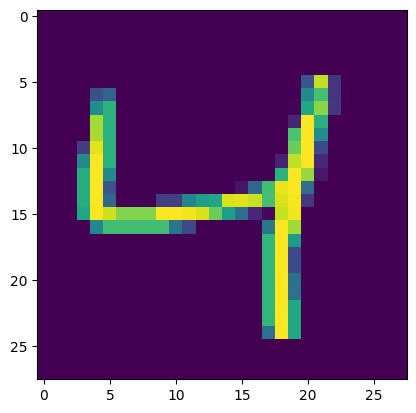

In [8]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [9]:
X_train = X_train/255
X_test = X_test/255

_model below_

In [45]:
model = Sequential()

model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [46]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_19 (Dense)            (None, 128)               100480    
                                                                 
 dense_20 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics='Accuracy')

In [48]:
history = model.fit(X_train, Y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2870 - Accuracy: 0.9191 - val_loss: 0.1517 - val_Accuracy: 0.9584
Epoch 2/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1290 - Accuracy: 0.9624 - val_loss: 0.1174 - val_Accuracy: 0.9653
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0884 - Accuracy: 0.9742 - val_loss: 0.0972 - val_Accuracy: 0.9708
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0668 - Accuracy: 0.9798 - val_loss: 0.0916 - val_Accuracy: 0.9728
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0504 - Accuracy: 0.9846 - val_loss: 0.0915 - val_Accuracy: 0.9733
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0405 - Accuracy: 0.9877 - val_loss: 0.0968 - val_Accuracy: 0.9718
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0315 - Accuracy: 0.9903 - val_loss: 0.0862 - val_Accuracy:

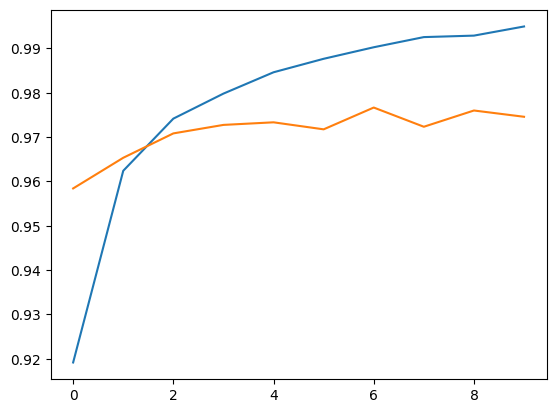

In [53]:
plt.plot(history.history['Accuracy'])
plt.plot(history.history['val_Accuracy'])

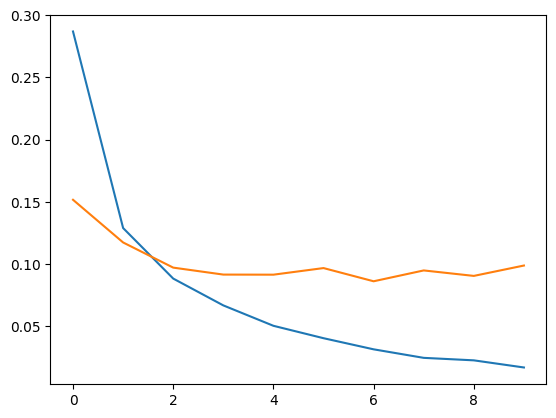

In [51]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [54]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [55]:
y_pred = y_prob.argmax(axis=1)

In [56]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_pred)

0.9765

1/1 [==============================] - 0s 22ms/step
[7]


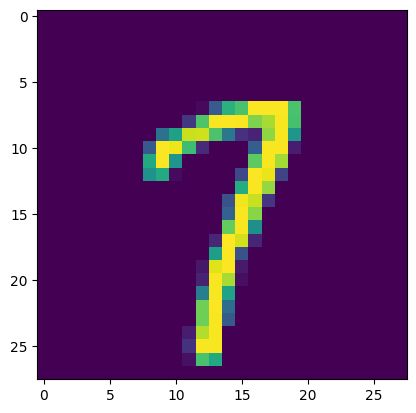

In [62]:
idx = 666 # change this idx to use the model <10000

plt.imshow(X_test[idx])
print(model.predict(X_test[idx]).argmax(axis=1))